# EX9 Pitch,Energy and Zero Crossing Rate  of Speech signal

Number of sample points:314074


<ipython-input-8-6cfc5187193c>:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  wave_data = np.fromstring(Str_data, dtype = np.short)


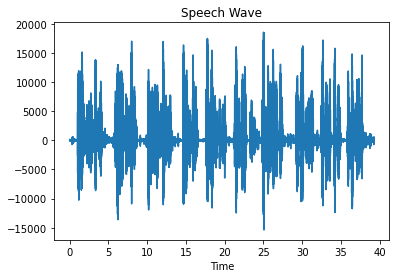

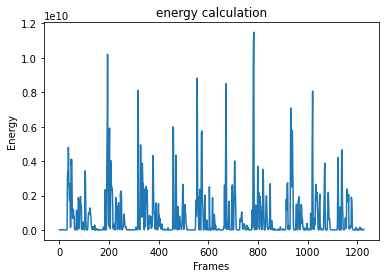

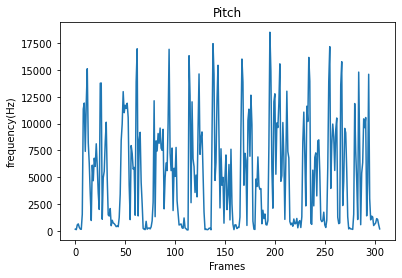

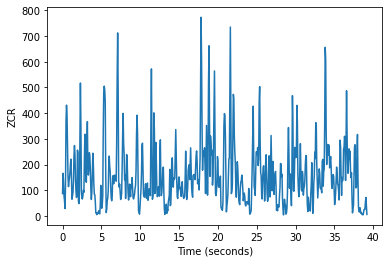

In [8]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
import math
# Calculate the energy of each frame 256 samples are one frame
def calEnergy(wave_data) :
    energy = []
    sum = 0
    for i in range(len(wave_data)) :
        sum = sum + (int(wave_data[i]) * int(wave_data[i]))
        if (i + 1) % 256 == 0 :
            energy.append(sum)
            sum = 0
        elif i == len(wave_data) - 1 :
            energy.append(sum)
    return energy

#######read the wav file and parameters ############################
f = wave.open("./auds/sample1.wav" ,"rb")
# getparams() returns the format information of all WAV files at once
params = f.getparams()
# nframes Number of sampling points
nchannels, sampwidth, framerate, nframes = params[:4]
# readframes() Read data according to the sampling point
Str_data = f.readframes(nframes) # str_data is a binary string
# gets the frame rate
Str_data = np.frombuffer(Str_data, dtype ="int16")
f_rate = f.getframerate()
# Convert to a two-byte array form (two bytes per sample point)
wave_data = np.fromstring(Str_data, dtype = np.short)
print( "Number of sample points:" + str(len(wave_data)))  
time = np.linspace(0, # start
 len(Str_data) / f_rate,
 num = len(Str_data)
 )
plt.figure(1)
plt.title("Speech Wave")


plt.xlabel("Time")
plt.plot(time, Str_data)
plt.show()
energy = calEnergy(wave_data)
plt.figure()
plt.plot(energy)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('Energy')
plt.title('energy calculation')
plt.show()

#########Pitch Calculation##############
FRAME_SIZE = 1024
def ProcessFrame(frame, Fs):
    freq = max(frame)
    return freq
Fs, data = read('./auds/sample1.wav')
numFrames = int(len(data) / FRAME_SIZE)
frequencies = np.zeros(numFrames)
for i in range(numFrames):
    frame = data[i * FRAME_SIZE : (i + 1) * FRAME_SIZE]
    frequencies[i] = ProcessFrame(frame.astype(float), Fs)
plt.figure()
plt.plot(frequencies)
plt.axis('tight')
plt.xlabel('Frames')
plt.ylabel('frequency(Hz)')
plt.title('Pitch')
plt.show()

####### Zero crossing############
def ZeroCR(waveData,frameSize,overlap):
    wlen = len(waveData)
    step = frameSize - overlap
    frameNum = math.ceil(wlen/step)
    zcr = np.zeros((frameNum,1))
    for i in range(frameNum):
        curFrame = waveData[np.arange(i*step,min(i*step+frameSize,wlen))]
 #To avoid DC bias, usually we need to perform mean subtraction on each frame
        curFrame = curFrame - np.mean(curFrame) # zero-justified
        zcr[i] = sum(curFrame[0:-1]*curFrame[1::]<=0)
    return zcr
overlap = 512
#Read wav file and parameters from energy programm
wave_data.shape = -1, 1
zcr = ZeroCR(wave_data,FRAME_SIZE,overlap)
time2 = np.arange(0, len(zcr)) * (len(wave_data)/len(zcr) / f_rate)
plt.plot(time2, zcr)
plt.ylabel('ZCR')
plt.xlabel('Time (seconds)')
plt.show()
f.close()

In [7]:
print(wave_data)
print(time)

[[ 52]
 [ 67]
 [ 54]
 ...
 [266]
 [254]
 [232]]
[0.00000000e+00 1.25000398e-04 2.50000796e-04 ... 3.92590000e+01
 3.92591250e+01 3.92592500e+01]
